In [1]:
using Graphs
using Plots
using Base.Threads
using Random
include("../mpdbp.jl")
include("../inference/zero_patient.jl")
include("../bp_fast.jl")
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [75]:
T = 20
N = 50
k = 4
gg = random_regular_graph(N, k)
g = IndexedGraph(gg)
t = SimpleGraph(prim_mst(gg))
g = IndexedGraph(t)
λ_true = 0.2
κ_true = 0.1
γ = 3/N
p⁰ = map(1:N) do i
    [1-γ, γ]
end;

In [76]:
sis_true = SIS(g, λ_true, κ_true, T; p⁰)
X, _ = onesample(mpdbp(sis_true));

In [77]:
lambdas = 0.01:0.01:0.3
kappas = 0.01:0.01:0.3
f = fill!(lambdas*kappas', 0);

In [78]:
# λ = λ_true
# κ = κ_true
# bp = mpdbp(SIS(g, λ, κ, T; p⁰))
# rng = MersenneTwister(0)
# x = draw_node_observations!(bp.ϕ, X, (T)*N; rng, softinf=1e2)
# iterate!(bp; maxiter=100, tol=1e-3, showprogress=false)

In [79]:
nobs = (T*N) ÷ 10

100

In [ ]:
for (i,λ) in enumerate(lambdas)
    println("## λ $i of ", length(lambdas))
    @threads for j in eachindex(kappas)
        κ = kappas[j]
        bp = mpdbp(SIS(g, λ, κ, T; p⁰))
        rng = MersenneTwister(0)
        draw_node_observations!(bp.ϕ, X, nobs; rng)
        iterate!(bp; maxiter=100, tol=1e-3, showprogress=false)
        f[i,j] = bethe_free_energy(bp)
    end
end

## λ 1 of 30
## λ 2 of 30


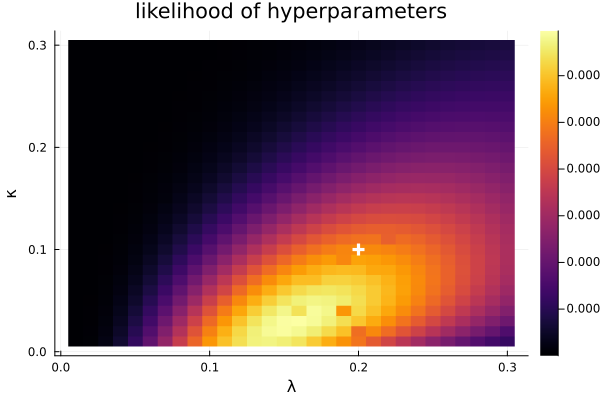

In [82]:
heatmap(lambdas, kappas, exp.(-f)',title="likelihood of hyperparameters", xlabel="λ", ylabel="κ")
scatter!([λ_true], [κ_true], m=:plus, label="", c=:white, msw=4, ms=6)